# Your name: Elisabeth Webb
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [0]:
# import packages 
import pandas as pd 
import numpy as np 
from sklearn.impute import SimpleImputer
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')


# Data File Reading Section
## Write code to read in data from external sources here

In [24]:
#read datasets
data=pd.read_csv('data.csv')
data.head(10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,3/1/1990
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,4/1/1990
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,4/1/1990
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,4/1/1990
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,5/1/1990


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [25]:
# Your code for this section here ...
#descriptive statistics
data.describe() #1
data.shape #2
data.count() #3
data.isnull().sum() #4
data.info() #5
data.head(10) #6
data.tail(10) #6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,9/12/2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/9/2015
435733,SAMP,12/12/2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/12/2015
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/15/2015
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/18/2015
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/21/2015
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/24/2015
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/29/2015
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [26]:
# Cleaning up the data

#dropping columns that aren't required

# ... your code here
data=data.drop(columns=['stn_code','agency','sampling_date','location_monitoring_station'], axis=1)

# dropping rows where no date is available

# ... your code here
data.dropna(subset=['date'], how='all', inplace=True)
data['date'].isnull().sum()


0

In [27]:
# displaying final columns (data.columns)

# ... your code here
data.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [0]:
# ... Your code here
types = { "Residential": "R", "Residential and others": "RO", "Residential, Rural and other Areas": "RRO", "Industrial Area": "I", "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", "Sensitive Areas": "S", "Sensitive": "S", np.nan: "RRO" }
data.type=data.type.replace(types)

In [30]:
# Display top 10 records after codification of 'types'
# ... Your code here
data.head(10)


,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,3/1/1990
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,3/1/1990
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,4/1/1990
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,4/1/1990
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,4/1/1990
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,5/1/1990


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [31]:
# ... Your code here
import datetime
data = pd.DataFrame(data)
data['year']=pd.to_datetime(data['date'])
data['year'] = pd.DatetimeIndex(data['date']).year
data.head(5)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 10 columns):
state       435735 non-null object
location    435735 non-null object
type        435735 non-null object
so2         401092 non-null float64
no2         419505 non-null float64
rspm        395516 non-null float64
spm         198355 non-null float64
pm2_5       9314 non-null float64
date        435735 non-null object
year        435735 non-null int64
dtypes: float64(5), int64(1), object(4)
memory usage: 36.6+ MB


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [32]:
# define columns of importance, which shall be used reguarly (COLS = ....)
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
# Display data.info after the transformation
# Display that there are no more missing values in the dataset

# ... your code here
COLS = ['so2','no2','rspm','spm','pm2_5']
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(data[COLS])
data[COLS]=pd.DataFrame(imp.transform(data[COLS]), index=data.index)
data.info() #after the transformation
data.isnull().sum() #no more missing values in the dataset 



<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 10 columns):
state       435735 non-null object
location    435735 non-null object
type        435735 non-null object
so2         435735 non-null float64
no2         435735 non-null float64
rspm        435735 non-null float64
spm         435735 non-null float64
pm2_5       435735 non-null float64
date        435735 non-null object
year        435735 non-null int64
dtypes: float64(5), int64(1), object(4)
memory usage: 36.6+ MB


state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
year        0
dtype: int64

## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

In [34]:
# ... Your code here
state_so2=data.groupby('state')['so2'].median().sort_values()
#barchart  
plt.bar(state_so2.index, state_so2, color='red')
plt.ylabel('SO2 Status')
plt.xlabel('State')
plt.ylim(None,30)
plt.xticks(rotation=90)
plt.show()


state
Nagaland                 2.000000
Mizoram                  2.000000
Meghalaya                2.000000
Arunachal Pradesh        2.500000
Himachal Pradesh         3.000000
Kerala                   4.200000
Telangana                5.000000
Odisha                   5.000000
Jammu & Kashmir          5.000000
Andhra Pradesh           5.000000
Goa                      6.000000
Rajasthan                6.300000
Delhi                    6.300000
Assam                    6.500000
Puducherry               7.266667
Daman & Diu              7.600000
Chandigarh               7.950000
West Bengal              8.000000
Dadra & Nagar Haveli     8.400000
Karnataka               10.000000
Uttar Pradesh           10.000000
Tamil Nadu              10.000000
Punjab                  10.300000
Manipur                 10.829428
Bihar                   10.829428
Haryana                 10.829428
Madhya Pradesh          10.829428
Chhattisgarh            12.500000
Maharashtra             13.000000
Gujarat 

### no2 status

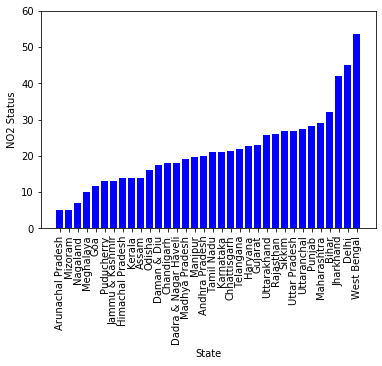

In [18]:
# ... Your code here
state_no2=data.groupby('state')['no2'].median().sort_values()
#barchart  
plt.bar(state_no2.index, state_no2, color='blue')
plt.ylabel('NO2 Status')
plt.xlabel('State')
plt.ylim(None,60)
plt.xticks(rotation=90)
plt.show()

### rspm status

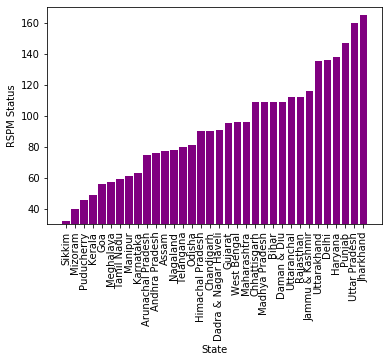

In [19]:
# ... Your code here
state_rspm=data.groupby('state')['rspm'].median().sort_values()
#barchart  
plt.bar(state_rspm.index, state_rspm, color='purple')
plt.ylabel('RSPM Status')
plt.xlabel('State')
plt.ylim(30,170)
plt.xticks(rotation=90)
plt.show()

### spm status

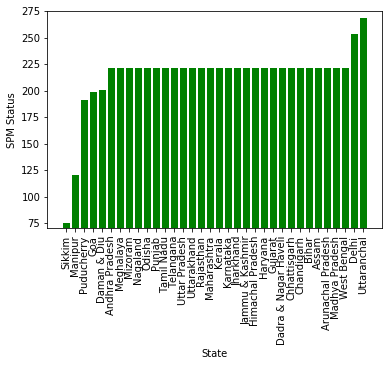

In [20]:
# ... Your code here
state_spm=data.groupby('state')['spm'].median().sort_values()
#barchart  
plt.bar(state_spm.index, state_spm, color='green')
plt.ylabel('SPM Status')
plt.xlabel('State')
plt.ylim(70,275)
plt.xticks(rotation=90)
plt.show()

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [21]:
# ... Your code here
data_new=data[data['state']=='Andhra Pradesh'].groupby('year')[['no2','so2','rspm','spm']].mean()
data_new.head(5)

,no2,so2,rspm,spm
year,,,,
1990,15.296552,8.868966,108.833091,165.469596
1991,18.827778,10.811111,108.833091,154.466208
1992,36.012866,19.766194,108.833091,210.643678
1993,15.961111,8.544444,108.833091,220.783480
1994,18.273016,10.760317,108.833091,177.965950


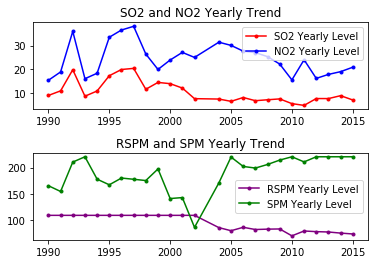

In [39]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.

# ... Your code here
plt.subplot(2,1,1)
plt.plot(data_new.groupby('year')['so2'].mean(),c='red',marker='o', markersize=3, linestyle='-',label='SO2 Yearly Level')
plt.plot(data_new.groupby('year')['no2'].mean(), c='blue', marker='o', markersize=3,linestyle='-', label='NO2 Yearly Level')
plt.legend()
plt.title('SO2 and NO2 Yearly Trend')

plt.subplot(2,1,2)
plt.plot(data_new.groupby('year')['rspm'].mean(),c='purple',marker='o', markersize=3, linestyle='-',label='RSPM Yearly Level')
plt.plot(data_new.groupby('year')['spm'].mean(), c='green',marker='o',markersize=3, linestyle='-', label='SPM Yearly Level')
plt.legend()
plt.title('RSPM and SPM Yearly Trend')
plt.subplots_adjust(hspace=.5)


Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....

This analysis shows that from 1990 to 2015 in the state of Andhra Pradesh, nitrogen dioxide (no2) and sulfur dioxide both follow a similar trend of varying levels. However, no2 spikes around 2012, while so2 decreases then. No2 is higher in 2015 than 1990, while so2 is lower in 2015 than 1990. The second graph provides a couple interesting points. It shows that SPM drops in the early 2000s, and then quickly and drastically rises again from 100 ug/m3 to over 200 ug/m3. Around that same time period, RSPM levels begin to drop from its 12 year plateau of 120 ug/m3. SMP levels rise again and are higher in 2015 than 1990, while RSPM levels are lower in 2015 than 1990. This tells us that we should look into the year 2002 for why RSPM began to drop from previously staying the same level, and why RSPM dropped to its lowest level and then quickly rose again. In the state of Andhra Pradesh from 1990 to 2015, we can conclude that no2 and so2 levels follow similar trends of fluctuating levels, while RSPM drops and SPM wavers but overall increases. This information is helpful for us to further look into the reasons why drops or increases in levels happened in certain years as well as seeing the overall trend during this time period. 

